In [1]:
pwd

'C:\\Users\\Sonol\\Desktop\\knn'

In [2]:
import pandas as pd
df=pd.read_csv('train_fare.csv')
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0


In [3]:
df.shape

(1958885, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958885 entries, 0 to 1958884
Data columns (total 14 columns):
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
year                 int64
month                int64
day                  int64
dayOfWeek            int64
hour                 int64
timeOfDayMid.Day     int64
timeOfDayMorning     int64
timeOfDayNight       int64
dtypes: float64(5), int64(9)
memory usage: 209.2 MB


In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
count,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06
mean,1.061528e+01,-7.397526e+01,4.075089e+01,-7.397436e+01,4.075124e+01,1.684182e+00,3.736753e+00,6.268586e+00,1.570568e+01,4.122257e+00,1.350867e+01,2.363074e-01,1.398658e-01,4.344701e-01
std,6.787814e+00,4.479549e-02,3.424333e-02,4.329848e-02,3.716876e-02,1.306624e+00,1.863201e+00,3.437946e+00,8.682210e+00,1.988030e+00,6.513901e+00,4.248133e-01,3.468478e-01,4.956874e-01
min,3.300000e+00,-7.953506e+01,3.579768e+01,-7.948642e+01,3.556155e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073653e+01,-7.399160e+01,4.073550e+01,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075333e+01,-7.398062e+01,4.075383e+01,1.000000e+00,4.000000e+00,6.000000e+00,1.600000e+01,4.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,5.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,3.027000e+01,-7.000039e+01,4.426142e+01,-7.000227e+01,4.467143e+01,9.000000e+00,7.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
import pandas as pd
test_df=pd.read_csv('test_fare.csv')
test_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,-73.973320,40.763805,-73.981430,40.743835,1,7,1,27,3,13,1,0,0
1,-73.986862,40.719383,-73.998886,40.739201,1,7,1,27,3,13,1,0,0
2,-73.982524,40.751260,-73.979654,40.746139,1,3,10,8,7,11,1,0,0
3,-73.981160,40.767807,-73.990448,40.751635,1,4,12,1,7,21,0,0,1
4,-73.966046,40.789775,-73.988565,40.744427,1,4,12,1,7,21,0,0,1


In [6]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,3.815816,6.857979,16.194170,3.990014,13.467420,0.192758,0.147771,0.473169
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.960160,6.868584,0.394484,0.354891,0.499305
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2.000000,4.000000,9.000000,2.000000,8.000000,0.000000,0.000000,0.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,4.000000,7.000000,16.000000,4.000000,15.000000,0.000000,0.000000,0.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,6.000000,10.000000,25.000000,6.000000,19.000000,0.000000,0.000000,1.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,7.000000,12.000000,31.000000,7.000000,23.000000,1.000000,1.000000,1.000000


In [7]:
print("Instances where features of training data is null: ")
display(df.isnull().sum())
print("Occurences of negative fare amount: " + str(len(df[df['fare_amount']<0])))
print("Occurences with more than 6 passengers: " + str(len(df[df['passenger_count']>6])))
print("Occurences with exactly 0 passengers: " + str(len(df[df['passenger_count']==0])))

Instances where features of training data is null: 


fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
dayOfWeek            0
hour                 0
timeOfDayMid.Day     0
timeOfDayMorning     0
timeOfDayNight       0
dtype: int64

Occurences of negative fare amount: 0
Occurences with more than 6 passengers: 1
Occurences with exactly 0 passengers: 6953


In [8]:
import numpy as np
def getEuclidean_distance(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    return np.sqrt(((pickup_longitude-dropoff_longitude)**2) + ((pickup_latitude-dropoff_latitude)**2))
def get_manhattan_dist(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    return ((dropoff_longitude - pickup_longitude).abs() + (dropoff_latitude - pickup_latitude).abs())
df['euclidean_dist'] = getEuclidean_distance(df.pickup_longitude, df.pickup_latitude,df.dropoff_longitude,df.dropoff_latitude).astype(np.float32)
test_df['euclidean_dist'] = getEuclidean_distance(test_df.pickup_longitude, test_df.pickup_latitude,
                                       test_df.dropoff_longitude, test_df.dropoff_latitude).astype(np.float32)
df['manhattan_dist'] = get_manhattan_dist(df.pickup_longitude, df.pickup_latitude,
                                              df.dropoff_longitude, df.dropoff_latitude).astype(np.float32)

test_df['manhattan_dist'] = get_manhattan_dist(test_df.pickup_longitude, test_df.pickup_latitude,
                                       test_df.dropoff_longitude, test_df.dropoff_latitude).astype(np.float32)

In [9]:
def clean_data(df):
    
    print("Initial Train dataframe length: " + str(len(df)))
    
    # Remove null data
    df=df.dropna(how='any',axis='rows')
    print("Train dataframe length after removing NULL values: " + str(len(df)))
    
    df=df[(df.passenger_count<=6) & (df.passenger_count>=1)]
    print("Train dataframe length after filtering based on passenger counts: " + str(len(df)))
    
    df=df[(df.fare_amount>0) | ((df.fare_amount==0) & (df.manhattan_dist<0.75))]
    df=df[(df.fare_amount <= df.fare_amount.mean()+10*df.fare_amount.std())]
    print("Train dataframe length after filtering based on fare amount: " + str(len(df)))
    df=df[(df.pickup_longitude>=min(test_df.pickup_longitude)) & (df.pickup_longitude<=max(test_df.pickup_longitude))]
    df=df[(df.pickup_latitude>=min(test_df.pickup_latitude)) & (df.pickup_latitude<=max(test_df.pickup_latitude))]    
    df=df[(df.dropoff_longitude>=min(test_df.dropoff_longitude)) & (df.dropoff_longitude<=max(test_df.dropoff_longitude))]
    df=df[(df.dropoff_latitude>=min(test_df.dropoff_latitude)) & (df.dropoff_latitude<=max(test_df.dropoff_latitude))]
    print("Train dataframe length after filtering based on test data coordinates boundary: " + str(len(df)))
    
    return df



df=clean_data(df)

Initial Train dataframe length: 1958885
Train dataframe length after removing NULL values: 1958885
Train dataframe length after filtering based on passenger counts: 1951931
Train dataframe length after filtering based on fare amount: 1951931
Train dataframe length after filtering based on test data coordinates boundary: 1950582


In [10]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight,euclidean_dist,manhattan_dist
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0,0.009436,0.011742
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0,0.079696,0.107481
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1,0.013674,0.019212
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0,0.025340,0.029386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0,0.019470,0.027194


In [11]:
# distance Correlation
df.euclidean_dist.corr(df.fare_amount)

0.800932404500531

In [12]:
# Manhattan Correlation
df.manhattan_dist.corr(df.fare_amount)

0.777566243170192

In [13]:
df['time'] = df['timeOfDayMid.Day']+df['timeOfDayMorning']+df['timeOfDayNight']

In [14]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight,euclidean_dist,manhattan_dist,time
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0,0.009436,0.011742,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0,0.079696,0.107481,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1,0.013674,0.019212,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0,0.025340,0.029386,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0,0.019470,0.027194,1


In [15]:
df.time.corr(df.euclidean_dist)

0.0016552109513602383

In [16]:
#time correlation
df.time.corr(df.fare_amount)

-0.010303590924786814

Highest correlation is between Euclidean distance of the ride and the taxi fare

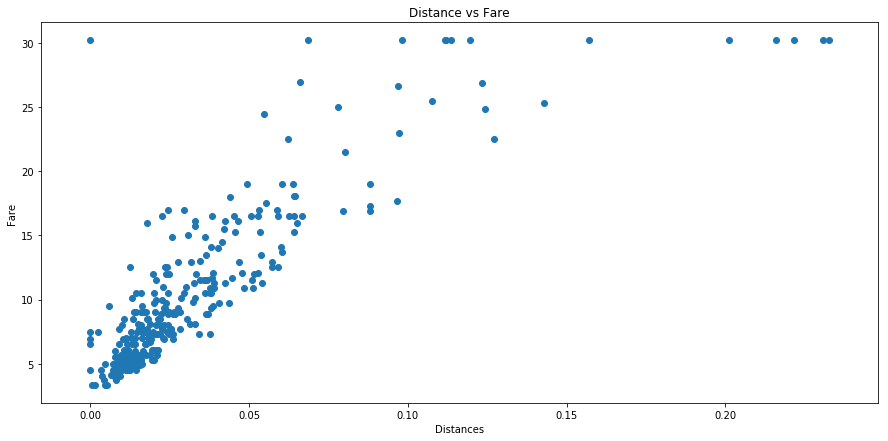

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.scatter(df.euclidean_dist[0:300],df.fare_amount[0:300])
plt.title('Distance vs Fare')
plt.xlabel('Distances')
plt.ylabel('Fare')
plt.show()

Text(0, 0.5, 'Distances')

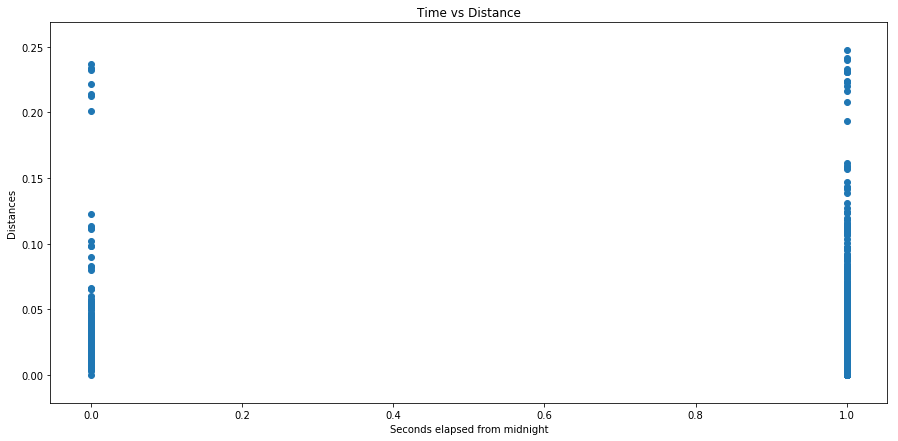

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.scatter(df.time[0:1000],df.euclidean_dist[0:1000])
plt.title('Time vs Distance')
plt.xlabel('Seconds elapsed from midnight')
plt.ylabel('Distances')

Text(0, 0.5, 'Fare')

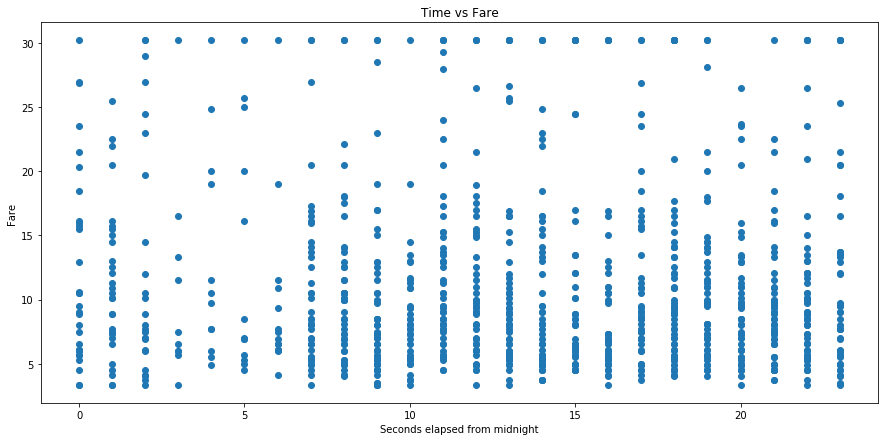

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.scatter(df.hour[0:1000],df.fare_amount[0:1000])
plt.title('Time vs Fare')
plt.xlabel('Seconds elapsed from midnight')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

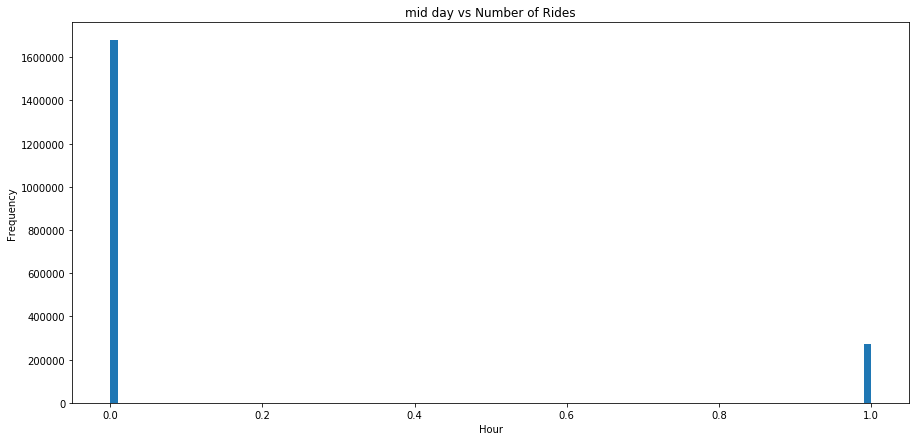

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.hist(df.timeOfDayMorning, bins=100)
plt.title('mid day vs Number of Rides')
plt.xlabel('Hour')
plt.ylabel('Frequency')

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
X = df.loc[:, df.columns != 'fare_amount']
y = df['fare_amount']

In [24]:
from sklearn.model_selection import train_test_split #set splitting and validation

#Split train set into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=0)


In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1560465, 16) (390117, 16) (1560465,) (390117,)


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
knn = KNeighborsRegressor(20)
knn.fit(X_train ,y_train )

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

In [29]:
y_pred = knn.predict(X_test)
y_pred

array([ 6.52  ,  6.5   , 16.4655, ...,  5.095 ,  5.46  , 18.13  ])

In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred) 
print(score*100)

83.13920724108851


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: continuous is not supported